### Dickey-Fuller Test for Time Series
test statistics >  critical values -> stationary time series

In [2]:
import numpy as np
traffic =np.load('/home/roseyu/data/tensorRNN/traffic_uci.npy')

In [3]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
%matplotlib inline
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


/home/roseyu/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
df = pd.DataFrame(traffic)
start = datetime.datetime.strptime("2008-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(hours=x) for x in range(0,10560)]
df['index'] =date_list
df.set_index(['index'], inplace=True)
df.index.name=None

/home/roseyu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/home/roseyu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


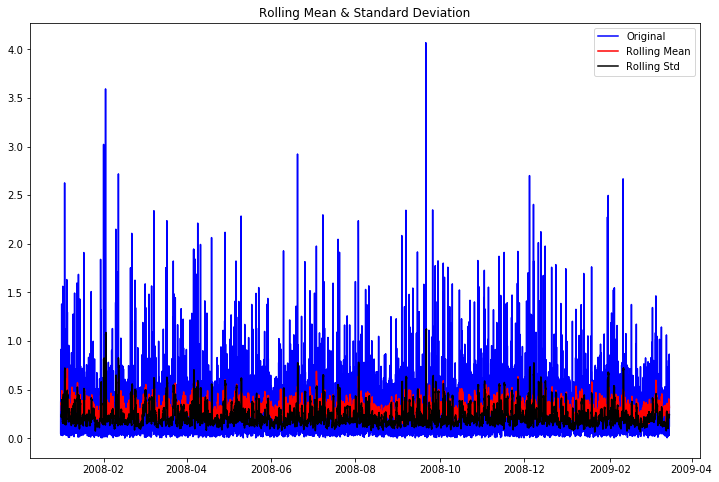

Results of Dickey-Fuller Test:
Test Statistic                -1.308676e+01
p-value                        1.823060e-24
#Lags Used                     3.900000e+01
Number of Observations Used    1.052000e+04
Critical Value (1%)           -3.430972e+00
Critical Value (5%)           -2.861815e+00
Critical Value (10%)          -2.566916e+00
dtype: float64


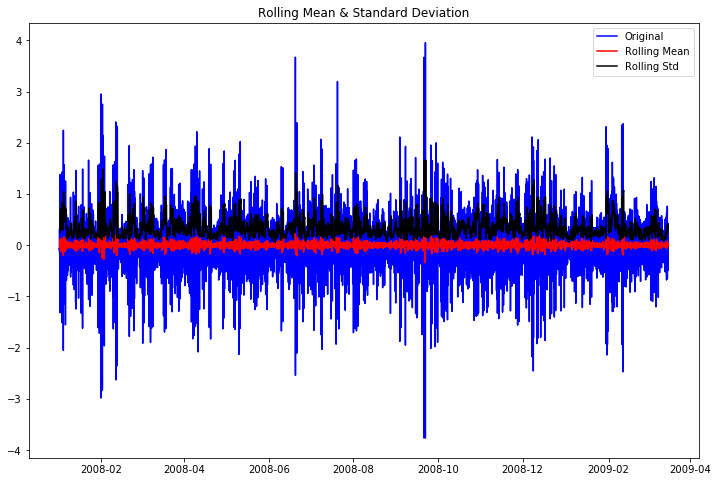

Results of Dickey-Fuller Test:
Test Statistic                   -31.831266
p-value                            0.000000
#Lags Used                        39.000000
Number of Observations Used    10495.000000
Critical Value (1%)               -3.430973
Critical Value (5%)               -2.861815
Critical Value (10%)              -2.566917
dtype: float64


In [5]:
ts = df[2]
test_stationarity(ts)
df['first_diff'] = ts -ts.shift(1) 
df['seasonal_first_diff'] = df.first_diff - df.first_diff.shift(24)  
test_stationarity(df.seasonal_first_diff.dropna(inplace=False))

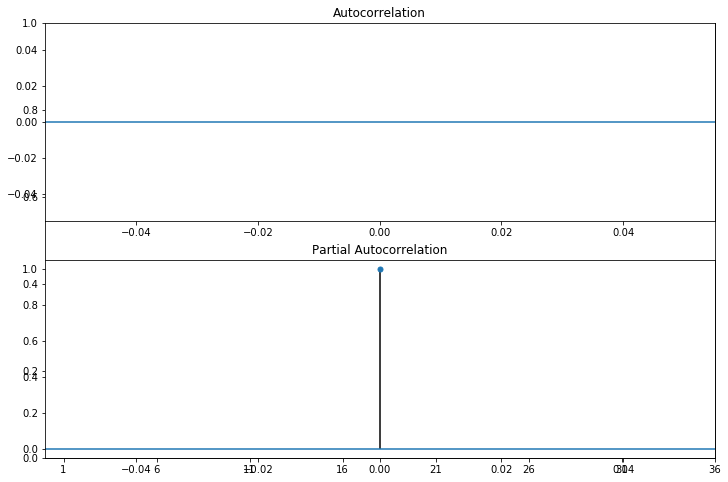

In [6]:
import statsmodels.api as sm
lag = 40

fig = plt.figure(figsize=(12,8))
my_xticks = [str(i) for i in range(1,lag,5)]
plt.xticks(range(1,lag,5), my_xticks)
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.seasonal_first_diff, lags= lag , ax=ax1, fft=True)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.seasonal_first_diff, lags= lag , ax=ax2)


In [19]:
import statsmodels.api as sm  

mod = sm.tsa.statespace.SARIMAX(ts.iloc[:1000], trend='n', order=(1,1,0), seasonal_order=(0,1,1,24))
results = mod.fit()

In [18]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  2   No. Observations:                 1000
Model:             SARIMAX(1, 1, 0)x(0, 1, 1, 24)   Log Likelihood                -236.741
Date:                            Tue, 22 Aug 2017   AIC                            481.482
Time:                                    19:48:51   BIC                            501.113
Sample:                                01-01-2008   HQIC                           488.943
                                     - 02-11-2008                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.333e-06      0.001     -0.004      0.997      -0.002       0.002
ar.L1         -0.4279      0.010   